In [1]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='q3KSomr8ByDalMZo6MwWwbE977jlBqqvrYPY7CiXb0Jm',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'smartlender-donotdelete-pr-xurlm0azqmdful'
object_key = 'loan_data.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.head()


,Unnamed: 0,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0,120,360,1,2,1
1,1,1,1,1,0,0,4583,1508,128,360,1,0,0
2,2,1,1,0,0,1,3000,0,66,360,1,2,1
3,3,1,1,0,1,0,2583,2358,120,360,1,2,1
4,4,1,0,0,0,0,6000,0,141,360,1,2,1


## Importing the Libraries

In [3]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler ,MaxAbsScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

## Visualizations

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


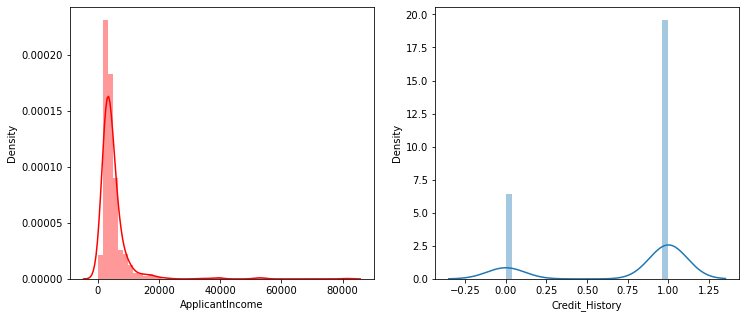

In [4]:
#plotting the using distplot
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(data['ApplicantIncome'], color='r')
plt.subplot(122)
sns.distplot(data['Credit_History'])
plt.show()

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.w

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

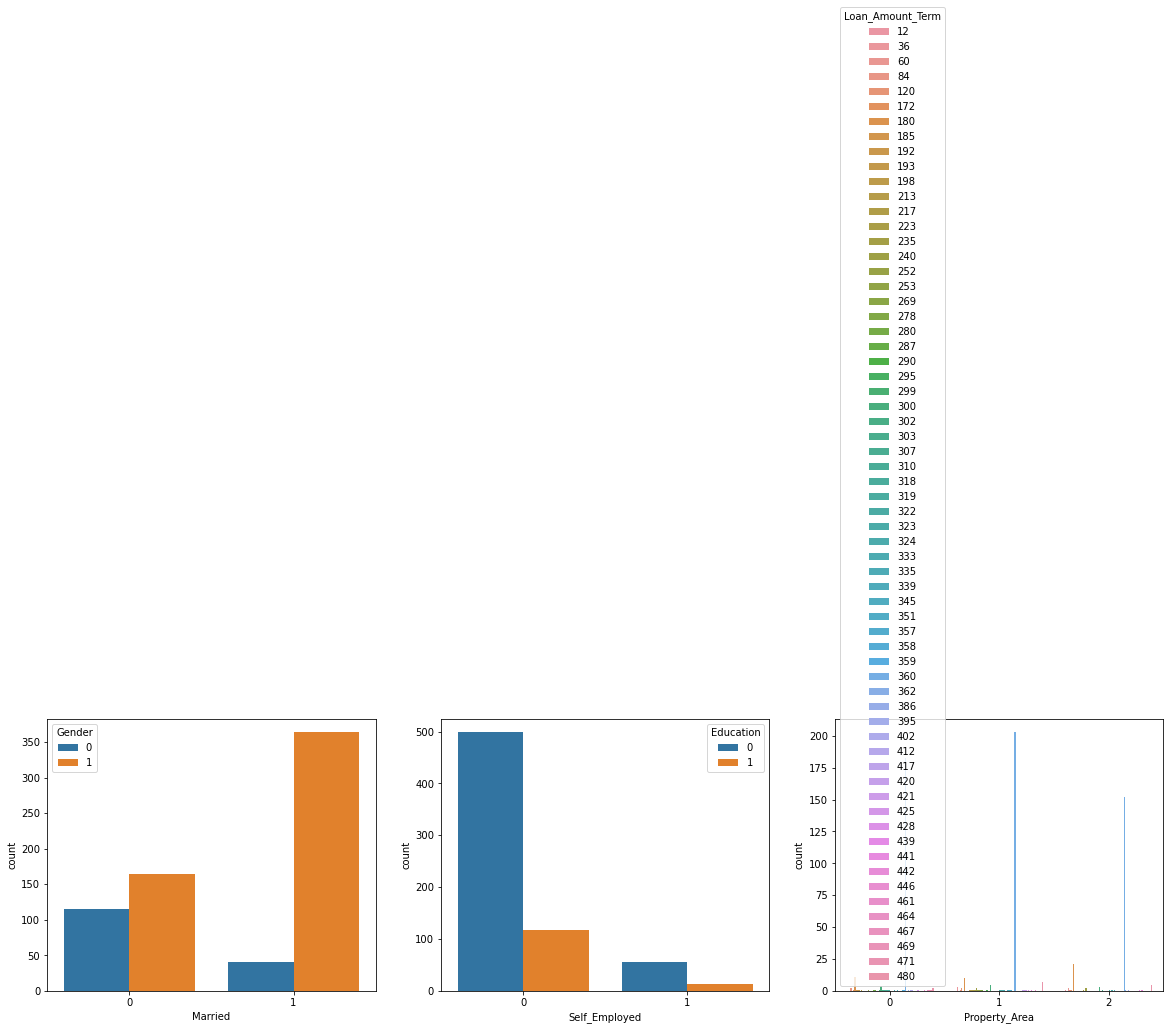

In [6]:
plt.figure(figsize=(20,5)) 
plt.subplot(131)
sns.countplot(data['Married'], hue=data['Gender'])
plt.subplot(132)
sns.countplot(data['Self_Employed'], hue=data['Education'])
plt.subplot(133)
sns.countplot(data['Property_Area'], hue=data['Loan_Amount_Term'])


/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 49.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 70.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Gender', ylabel='ApplicantIncome'>

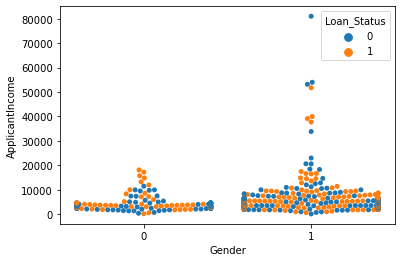

In [7]:
sns.swarmplot(data['Gender'], data['ApplicantIncome'], hue = data['Loan_Status'])

## Data Pre-processing

In [13]:
#IMB LEARN NOT WORKING IN CLOUD SO WE USED PROCESSESED DATA

In [8]:
data.describe()

,Unnamed: 0,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000
mean,341.500000,0.773392,0.590643,0.663743,0.190058,0.099415,5093.488304,1871.014620,141.247076,341.418129,0.752924,0.951754,0.516082
std,197.598077,0.418943,0.492075,0.937787,0.392634,0.299438,5832.391254,3938.035475,76.174448,66.250384,0.431627,0.789210,0.500107
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,170.750000,1.000000,0.000000,0.000000,0.000000,0.000000,2716.250000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,341.500000,1.000000,1.000000,0.000000,0.000000,0.000000,3716.500000,1311.000000,122.500000,360.000000,1.000000,1.000000,1.000000
75%,512.250000,1.000000,1.000000,1.000000,0.000000,0.000000,5653.500000,2367.500000,160.000000,360.000000,1.000000,2.000000,1.000000
max,683.000000,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Unnamed: 0         684 non-null    int64
 1   Gender             684 non-null    int64
 2   Married            684 non-null    int64
 3   Dependents         684 non-null    int64
 4   Education          684 non-null    int64
 5   Self_Employed      684 non-null    int64
 6   ApplicantIncome    684 non-null    int64
 7   CoapplicantIncome  684 non-null    int64
 8   LoanAmount         684 non-null    int64
 9   Loan_Amount_Term   684 non-null    int64
 10  Credit_History     684 non-null    int64
 11  Property_Area      684 non-null    int64
 12  Loan_Status        684 non-null    int64
dtypes: int64(13)
memory usage: 69.6 KB


## Handling the Null Values

In [10]:
data.isnull().sum()

Unnamed: 0           0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Handling the categorical columns

In [14]:
#changing the datype of each float column to int
data['Gender']=data['Gender'].astype('int64')
data['Married']=data['Married'].astype('int64')
data['Dependents']=data['Dependents'].astype('int64')
data['Self_Employed']=data['Self_Employed'].astype('int64')
data['CoapplicantIncome']=data['CoapplicantIncome'].astype('int64')
data['LoanAmount']=data['LoanAmount'].astype('int64')
data['Loan_Amount_Term']=data['Loan_Amount_Term'].astype('int64')
data['Credit_History']=data['Credit_History'].astype('int64')

## Processed Data 

In [15]:
data

,Unnamed: 0,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0,120,360,1,2,1
1,1,1,1,1,0,0,4583,1508,128,360,1,0,0
2,2,1,1,0,0,1,3000,0,66,360,1,2,1
3,3,1,1,0,1,0,2583,2358,120,360,1,2,1
4,4,1,0,0,0,0,6000,0,141,360,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
679,679,1,1,0,1,0,3068,1793,120,351,0,1,0
680,680,0,0,0,0,0,4585,0,126,360,0,0,0
681,681,0,0,0,0,0,2442,1851,135,360,0,0,0
682,682,0,0,0,0,0,2548,0,127,421,1,1,0


## Splitting the data

In [16]:
x=data.drop(["Loan_Status"],axis=1)

In [17]:
x

,Unnamed: 0,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,0,0,0,0,5849,0,120,360,1,2
1,1,1,1,1,0,0,4583,1508,128,360,1,0
2,2,1,1,0,0,1,3000,0,66,360,1,2
3,3,1,1,0,1,0,2583,2358,120,360,1,2
4,4,1,0,0,0,0,6000,0,141,360,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
679,679,1,1,0,1,0,3068,1793,120,351,0,1
680,680,0,0,0,0,0,4585,0,126,360,0,0
681,681,0,0,0,0,0,2442,1851,135,360,0,0
682,682,0,0,0,0,0,2548,0,127,421,1,1


In [19]:
y=data.Loan_Status
y

0      1
1      0
2      1
3      1
4      1
      ..
679    0
680    0
681    0
682    0
683    0
Name: Loan_Status, Length: 684, dtype: int64

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

## Building the Models

## Descision tree

In [21]:
def decisionTree(x_train, x_test, y_train, y_test):
    dt=DecisionTreeClassifier() 
    dt.fit(x_train,y_train) 
    yPred = dt.predict(x_test)
    print('***DecisionTreeClassifier***') 
    print('Confusion matrix')
    print(confusion_matrix(y_test,yPred)) 
    print('Classification report') 
    print(classification_report (y_test,yPred))
    print("score")
    print(dt.score(x_test,y_test))


## Random Forest

In [22]:
def randomForest(x_train, x_test, y_train, y_test):
    rf = RandomForestClassifier() 
    rf.fit(x_train,y_train) 
    yPred = rf.predict(x_test) 
    print('***RandomForestClassifier***') 
    print('Confusion matrix')
    print(confusion_matrix(y_test,yPred))
    print('Classification report')
    print(classification_report(y_test,yPred))
    print("score")
    print(rf.score(x_test,y_test))

## KNN

In [23]:
def KNN(x_train, x_test, y_train, y_test):
    knn = KNeighborsClassifier()
    knn.fit(x_train,y_train)
    yPred = knn.predict(x_test)
    print('***KNeighborsClassifier***') 
    print('Confusion matrix')
    print(confusion_matrix(y_test,yPred)) 
    print('Classification report')
    print(classification_report(y_test,yPred))
    print("score")
    print(knn.score(x_test,y_test))

## XGboost

In [24]:
def xgboost(x_train, x_test, y_train, y_test):
    xg = GradientBoostingClassifier()
    xg.fit(x_train,y_train)
    yPred = xg.predict(x_test)
    print('***Gradient BoostingClassifier***') 
    print('Confusion matrix')
    print(confusion_matrix(y_test,yPred)) 
    print('Classification report')
    print(classification_report(y_test,yPred))
    print("score")
    print(xg.score(x_test,y_test))

## Comapring Models

In [25]:
decisionTree(x_train, x_test, y_train, y_test)

***DecisionTreeClassifier***
Confusion matrix
[[51 11]
 [13 62]]
Classification report
              precision    recall  f1-score   support

           0       0.80      0.82      0.81        62
           1       0.85      0.83      0.84        75

    accuracy                           0.82       137
   macro avg       0.82      0.82      0.82       137
weighted avg       0.83      0.82      0.83       137

score
0.8248175182481752


In [26]:
randomForest(x_train, x_test, y_train, y_test)


***RandomForestClassifier***
Confusion matrix
[[45 17]
 [ 3 72]]
Classification report
              precision    recall  f1-score   support

           0       0.94      0.73      0.82        62
           1       0.81      0.96      0.88        75

    accuracy                           0.85       137
   macro avg       0.87      0.84      0.85       137
weighted avg       0.87      0.85      0.85       137

score
0.8540145985401459


In [27]:
KNN(x_train, x_test, y_train, y_test)

***KNeighborsClassifier***
Confusion matrix
[[34 28]
 [13 62]]
Classification report
              precision    recall  f1-score   support

           0       0.72      0.55      0.62        62
           1       0.69      0.83      0.75        75

    accuracy                           0.70       137
   macro avg       0.71      0.69      0.69       137
weighted avg       0.70      0.70      0.69       137

score
0.7007299270072993


In [28]:
xgboost(x_train, x_test, y_train, y_test)

***Gradient BoostingClassifier***
Confusion matrix
[[44 18]
 [ 6 69]]
Classification report
              precision    recall  f1-score   support

           0       0.88      0.71      0.79        62
           1       0.79      0.92      0.85        75

    accuracy                           0.82       137
   macro avg       0.84      0.81      0.82       137
weighted avg       0.83      0.82      0.82       137

score
0.8248175182481752


## Evaluating Performance Of The Model And Saving The Model

In [ ]:
# BY CHECKING THE MODELS WE CAN SAAY THAT THE RANDOM FOREST IS PERFORMING WELL

In [33]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf.score(x_test,y_test)

0.8467153284671532

In [42]:
rf.predict(x_test)

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0])

In [34]:
!pip install -U ibm-watson-machine-learning

In [35]:
from ibm_watson_machine_learning import APIClient
import json

In [36]:
wml_credentials = {
    "apikey":"WNOYbQ3_-Vz-1DZg4sfdB_I9RU2ki-1BDilaXGFq3_P0",
    "url":"https://us-south.ml.cloud.ibm.com"
}

In [37]:
wml_client = APIClient(wml_credentials)
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  ------------  ------------------------
ID                                    NAME          CREATED
84db7564-cced-459a-a809-a1473f4d6a33  smart lender  2022-11-13T09:20:52.711Z
------------------------------------  ------------  ------------------------


In [38]:
SPACE_ID= "84db7564-cced-459a-a809-a1473f4d6a33"

In [39]:
wml_client.set.default_space(SPACE_ID)

'SUCCESS'

In [40]:
wml_client.software_specifications.list(500)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

In [41]:
import sklearn
sklearn.__version__

'1.0.2'

In [43]:
MODEL_NAME = 'samrt lender'
DEPLOYMENT_NAME = 'smart lender'
DEMO_MODEL = rf

In [44]:
# Set Python Version
software_spec_uid = wml_client.software_specifications.get_id_by_name('runtime-22.1-py3.9')

In [45]:
# Setup model meta
model_props = {
    wml_client.repository.ModelMetaNames.NAME: MODEL_NAME, 
    wml_client.repository.ModelMetaNames.TYPE: 'scikit-learn_1.0', 
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid 
}

In [46]:
#Save model
model_details = wml_client.repository.store_model(
    model=DEMO_MODEL, 
    meta_props=model_props, 
    training_data=x_train, 
    training_target=y_train
)

In [47]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'Loan_Status',
  'schemas': {'input': [{'fields': [{'name': 'Unnamed: 0', 'type': 'int64'},
      {'name': 'Gender', 'type': 'int64'},
      {'name': 'Married', 'type': 'int64'},
      {'name': 'Dependents', 'type': 'int64'},
      {'name': 'Education', 'type': 'int64'},
      {'name': 'Self_Employed', 'type': 'int64'},
      {'name': 'ApplicantIncome', 'type': 'int64'},
      {'name': 'CoapplicantIncome', 'type': 'int64'},
      {'name': 'LoanAmount', 'type': 'int64'},
      {'name': 'Loan_Amount_Term', 'type': 'int64'},
      {'name': 'Credit_History', 'type': 'int64'},
      {'name': 'Property_Area', 'type': 'int64'}],
     'id': '1',
     'type': 'struct'}],
   'output': []},
  'software_spec': {'id': '12b83a17-24d8-5082-900f-0ab31fbfd3cb',
   'name': 'runtime-22.1-py3.9'},
  'type': 'scikit-learn_1.0'},
 'metadata': {'created_at': '2022-11-13T09:25:42.802Z',
  'id': '5d05ed33-c7f9-4bd5-a6d4-2d93ac85ec99',
  'modif

In [48]:
model_id = wml_client.repository.get_model_id(model_details)
model_id

'5d05ed33-c7f9-4bd5-a6d4-2d93ac85ec99'

In [49]:
# Set meta
deployment_props = {
    wml_client.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME, 
    wml_client.deployments.ConfigurationMetaNames.ONLINE: {}
}

In [50]:
# Deploy
deployment = wml_client.deployments.create(
    artifact_uid=model_id, 
    meta_props=deployment_props 
)



#######################################################################################

Synchronous deployment creation for uid: '5d05ed33-c7f9-4bd5-a6d4-2d93ac85ec99' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='3ef47624-fc52-4a05-862e-23f7291f08ad'
------------------------------------------------------------------------------------------------


